# 05. Exploratory Data Analysis

### Importando as bibliotecas

In [1]:
import sys
sys.path.append('..')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import functions.fn_stats as fn_stats
import params.consts as consts

### Lendo o dataset tratado e visualizando o overview atual

In [2]:
df = pd.read_csv(consts.DATASET_LEAN, parse_dates=True, index_col='Date') # Armazenando o dataset em uma variável

In [3]:
pd.options.display.float_format = '{:.2f}'.format # Formatando os dados do dataset com 2 casas decimais

In [4]:
df # Exbindo uma visão geral do dataset

,Open,High,Low,Close,Volume,Daily Variation
Date,,,,,,
2023-11-30 00:00:00-03:00,68.34,68.74,68.08,68.20,29712900,0.01
2023-12-01 00:00:00-03:00,69.01,69.70,68.72,69.46,25025200,0.02
2023-12-04 00:00:00-03:00,68.56,68.80,67.45,67.90,22402300,-0.02
2023-12-05 00:00:00-03:00,67.62,67.75,66.98,67.27,25179500,-0.01
2023-12-06 00:00:00-03:00,67.87,68.26,66.60,66.83,20503900,-0.01
...,...,...,...,...,...,...
2024-11-25 00:00:00-03:00,58.18,58.56,58.12,58.17,17444500,-0.00
2024-11-26 00:00:00-03:00,58.29,58.49,57.15,57.43,21406600,-0.01
2024-11-27 00:00:00-03:00,57.87,58.42,57.60,58.13,22121200,0.01


In [5]:
df.shape # Visualizando a quantidade de linhas e colunas do dataset

(252, 6)

In [6]:
df.info() # Exibindo as informações das variáveis do dataset

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-11-30 00:00:00-03:00 to 2024-11-29 00:00:00-03:00
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Open             252 non-null    float64
 1   High             252 non-null    float64
 2   Low              252 non-null    float64
 3   Close            252 non-null    float64
 4   Volume           252 non-null    int64  
 5   Daily Variation  252 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


In [7]:
fn_stats.describe(df) # Usando a função que exibe as estatísticas das colunas numéricas

,Open,High,Low,Close,Volume,Daily Variation
count,252.00,252.00,252.00,252.00,252.00,252.00
mean,61.23,61.65,60.69,61.14,22937742.06,-0.00
std,3.45,3.48,3.39,3.42,10247841.88,0.01
min,55.90,56.09,55.48,56.00,0.00,-0.05
25%,58.69,59.02,58.15,58.68,16484125.00,-0.01
50%,60.67,61.11,60.21,60.70,20589700.00,-0.00
75%,62.50,62.91,62.05,62.47,26748450.00,0.01
max,71.66,72.21,70.97,71.47,72721200.00,0.06


In [8]:
df.isnull().sum() # Somando todos os valores nulos de cada coluna

Open               0
High               0
Low                0
Close              0
Volume             0
Daily Variation    0
dtype: int64

### Exibindo o gráfico com o preço das ações

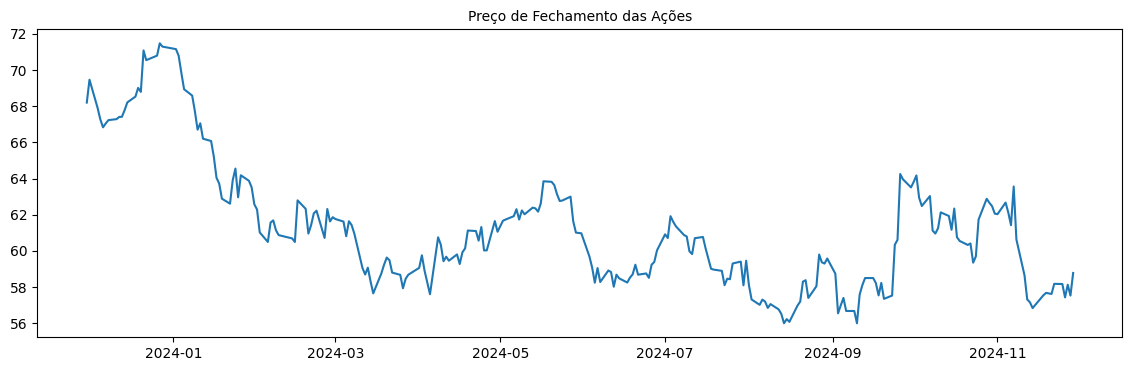

In [9]:
fig, ax = plt.subplots(figsize=(14,4)) # Definindo o tamanho da figura
plt.plot(df['Close']) # Passando os dados a serem plotados no gráfico
plt.title('Preço de Fechamento das Ações', size = 10) # Exibindo o título do gráfico
plt.show() # Exibindo o gráfico

### Calculando o retorno diário e o retorno diário acumulado

In [10]:
retorno_diario = df['Close'].pct_change().dropna() # Criando um dataset com as variações diárias

retorno_diario_acumulado = (1 - retorno_diario).cumprod() - 1 # Definindo o retorno diário acumulado

### Exibindo o gráfico de linha com o retorno diário ao longo do período

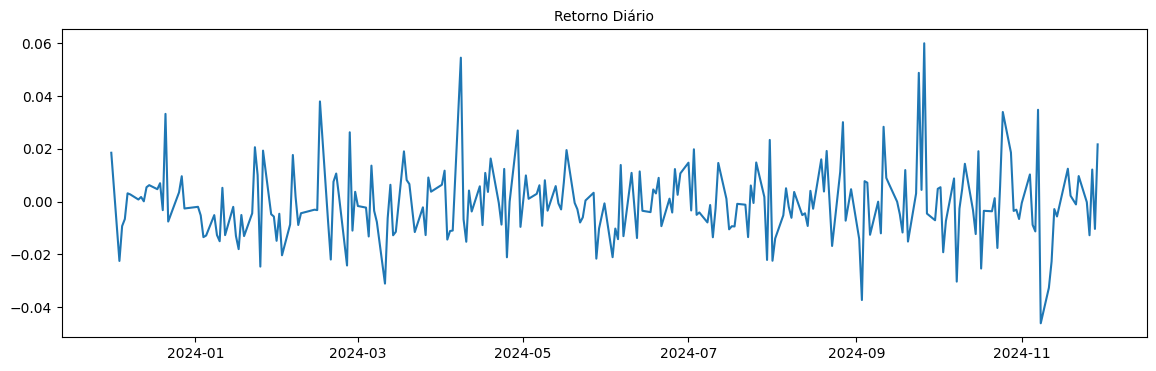

In [11]:
fig, ax = plt.subplots(figsize=(14,4)) # Definindo o tamanho da figura
plt.plot(retorno_diario) # Passando os dados a serem plotados no gráfico
plt.title('Retorno Diário', size = 10) # Exibindo o título do gráfico
plt.show() # Exibindo o gráfico

### Exibindo o histograma com a distribuição dos retornos diários

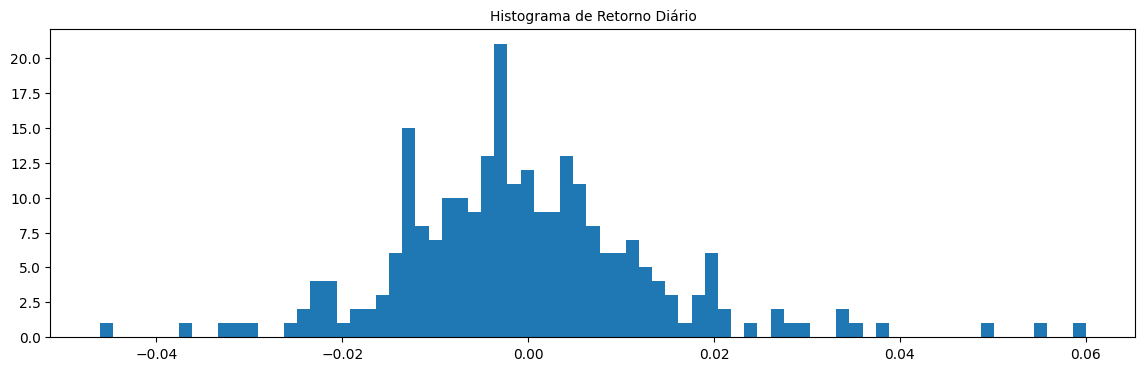

In [12]:
fig, ax = plt.subplots(figsize=(14,4)) # Definindo o tamanho da figura
plt.hist(retorno_diario, bins=75) # Passando os dados a serem plotados no gráfico
plt.title('Histograma de Retorno Diário', size = 10) # Exibindo o título do gráfico
plt.show() # Exibindo o gráfico

### Calculando os valores de Log

In [13]:
log_retorno_diario = (np.log(df['Close']) - np.log(df['Close']).shift(-1)).dropna() # Calculando o log do retorno diário
log_media_retorno_diario = np.mean(log_retorno_diario) # Calculando o log da média do retorno diário
log_desvio_retorno_diario = np.std(log_retorno_diario) # Calculando o log do desvio padrão do retorno diário

### Exibindo o gráfico de linha com o retorno diário ao longo do período (Log Transformation)

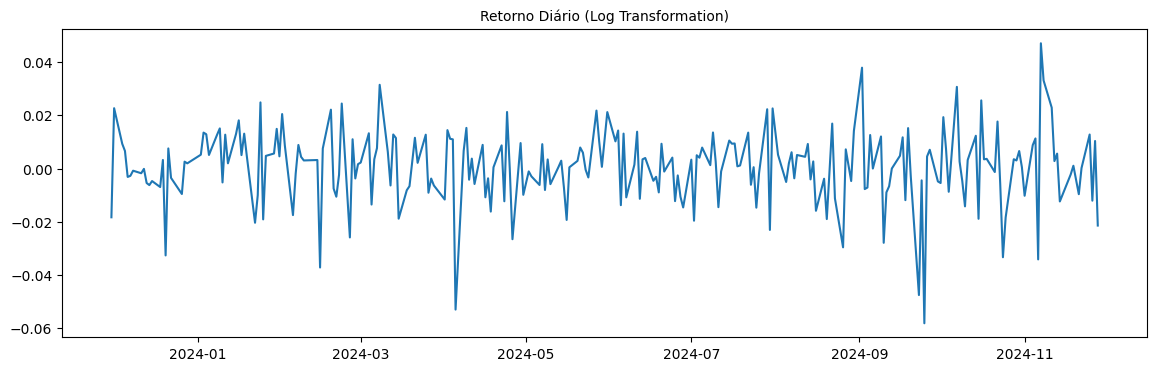

In [14]:
fig, ax = plt.subplots(figsize=(14,4)) # Definindo o tamanho da figura
plt.plot(log_retorno_diario) # Passando os dados a serem plotados no gráfico
plt.title('Retorno Diário (Log Transformation)', size = 10) # Exibindo o título do gráfico
plt.show() # Exibindo o gráfico

### Exibindo o histograma com a distribuição dos retornos diários (Log Transformation)

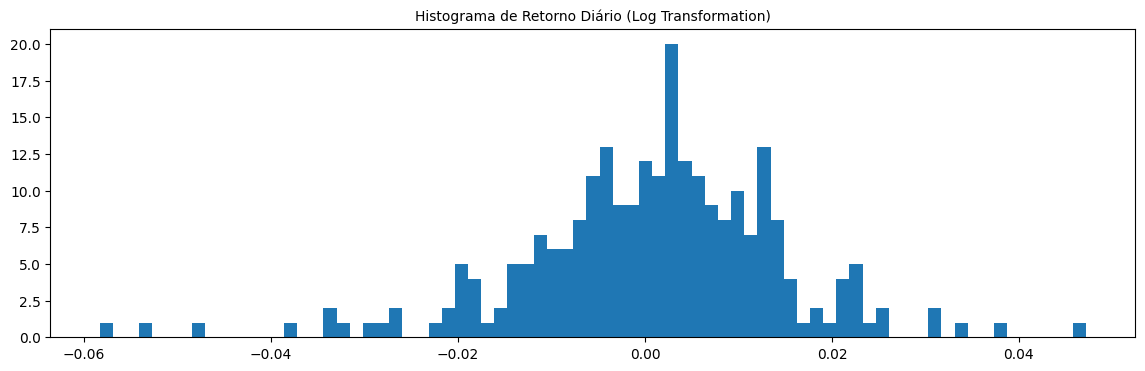

In [15]:
fig, ax = plt.subplots(figsize=(14,4)) # Definindo o tamanho da figura
plt.hist(log_retorno_diario, bins=75) # Passando os dados a serem plotados no gráfico
plt.title('Histograma de Retorno Diário (Log Transformation)', size = 10) # Exibindo o título do gráfico
plt.show() # Exibindo o gráfico

### Realizando as simulações de Monte Carlo

In [16]:
dias_posteriores = 180 # Definindo os dias posteriores a serem simulados

simulacoes = 2500 # Definindo a quantidade de simulações

ultimo_preco = df['Close'].iloc[-1] # Definindo o valor do último preço de fechamento da ação

results = np.empty((simulacoes, dias_posteriores)) # Criando um array vazio para guardar os resultados das simulações

for s in range(simulacoes): # Criando uma estrutura de repetição para realizar as simulações de Monte Carlo
    
    random_returns = 1 + np.random.normal(
        loc = log_media_retorno_diario, 
        scale = log_desvio_retorno_diario,
        size = dias_posteriores
    ) # Calculando o valor aleatório

    result = ultimo_preco * (random_returns.cumprod()) # Calculando o resultado da simulação

    results[s, :] = result # Armazenando o resultado no array vazio criado anteriormente

In [17]:
index = pd.date_range('2024-11-30', periods=dias_posteriores, freq='D') # Criando o índice com a data atual para usar no dataframe
resultados = pd.DataFrame(results.T, index=index) # Criando um dataframe com os resultados das simulações
media_resultados = resultados.apply('mean', axis=1) # Calculando a média das simulações

In [18]:
resultados.head() # Exibindo o dataset criado com as simulações

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
2024-11-30,59.81,58.71,59.01,58.09,58.71,57.93,59.02,57.99,57.63,58.09,...,60.00,59.46,59.41,57.81,57.75,58.07,59.27,58.31,58.42,60.34
2024-12-01,60.17,57.01,57.13,57.17,59.21,57.42,58.37,57.79,58.14,57.67,...,59.88,59.18,59.39,58.54,56.74,57.72,59.42,58.10,58.37,60.43
2024-12-02,59.99,57.33,57.55,55.95,59.27,56.46,57.33,57.61,58.29,57.02,...,59.44,59.32,58.80,57.90,56.68,57.83,59.42,57.79,58.16,61.20
2024-12-03,61.15,57.29,58.02,54.87,59.36,58.02,57.02,58.38,58.63,57.34,...,58.66,60.21,60.70,55.89,55.01,58.19,59.14,57.73,57.32,61.93
2024-12-04,59.89,58.10,58.70,54.64,60.47,57.59,57.59,58.34,59.43,57.90,...,59.05,59.17,60.60,55.39,55.28,58.51,58.61,57.78,57.95,60.77


In [19]:
df['Close'] # Exibindo somente a coluna que será plotada no gráfico

Date
2023-11-30 00:00:00-03:00   68.20
2023-12-01 00:00:00-03:00   69.46
2023-12-04 00:00:00-03:00   67.90
2023-12-05 00:00:00-03:00   67.27
2023-12-06 00:00:00-03:00   66.83
                             ... 
2024-11-25 00:00:00-03:00   58.17
2024-11-26 00:00:00-03:00   57.43
2024-11-27 00:00:00-03:00   58.13
2024-11-28 00:00:00-03:00   57.53
2024-11-29 00:00:00-03:00   58.78
Name: Close, Length: 252, dtype: float64

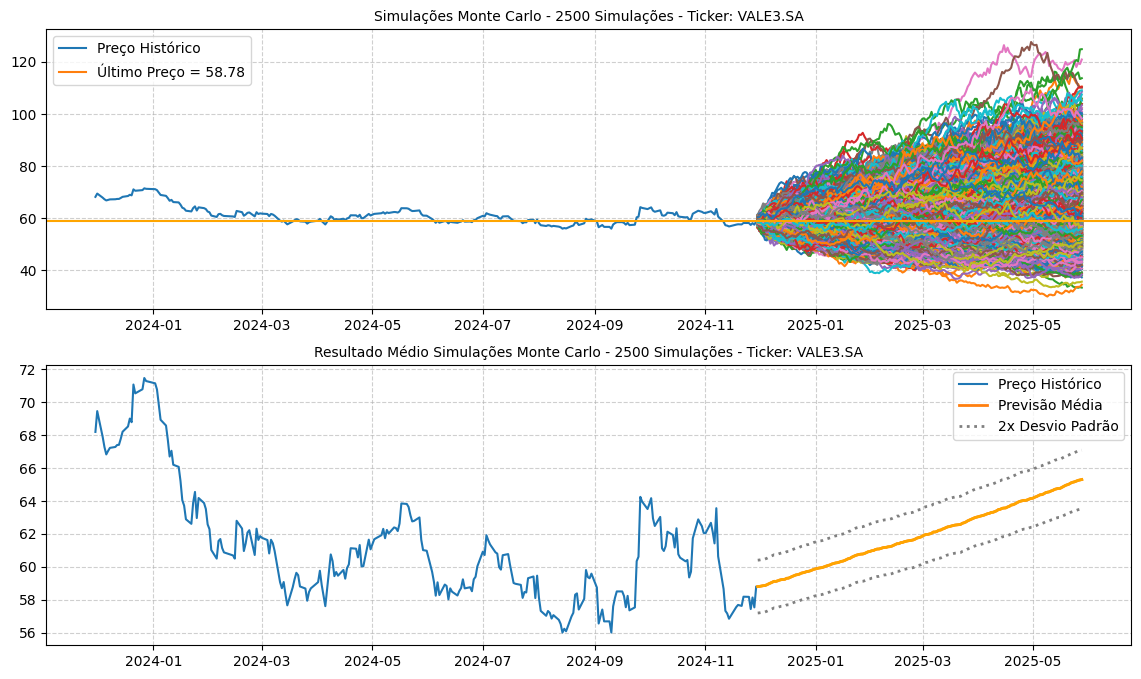

In [20]:
fig, ax = plt.subplots(figsize=(14,8), nrows=2, ncols=1) # Definindo o tamanho da figura para exibir os gráficos

ax[0].plot(df['Close']) # Plotando os resultados de fechamento passados
ax[0].plot(resultados) # Plotando todas as simulações 
ax[0].axhline(ultimo_preco, c='orange') # Exibindo uma linha com o último preço
ax[0].set_title(f'Simulações Monte Carlo - {simulacoes} Simulações - Ticker: VALE3.SA', size=10) # Definindo o título do gráfico
ax[0].legend(['Preço Histórico', f'Último Preço = {ultimo_preco:.2f}']) # Definindo a legenda do gráfico
ax[0].grid(True, linestyle='--', alpha=0.6) # Exibindo as linhas de grade do gráfico

ax[1].plot(df['Close']) # Plotando os resultados de fechamento passados
ax[1].plot(resultados.apply('mean', axis=1), lw=2) # Plotando a média das simulações
ax[1].plot(media_resultados.apply((lambda x: x * (1+1.96 * log_desvio_retorno_diario))), lw=2, linestyle = 'dotted', c='gray') # Plotando uma linha com a média mais o desvio padrão
ax[1].plot(media_resultados, lw=2, c='orange') # Plotando uma linha com a média das simulações
ax[1].plot(media_resultados.apply((lambda x: x * (1-1.96 * log_desvio_retorno_diario))), lw=2, linestyle = 'dotted', c='gray') # Plotando uma linha com a média menos o desvio padrão
ax[1].set_title(f'Resultado Médio Simulações Monte Carlo - {simulacoes} Simulações - Ticker: VALE3.SA', size=10) # Definindo o título do gráfico
ax[1].legend(['Preço Histórico', 'Previsão Média', '2x Desvio Padrão']) # Definindo a legenda do gráfico
ax[1].grid(True, linestyle='--', alpha=0.6) # Exibindo as linhas de grade do gráfico

plt.show() # Exibindo os gráficos